In [ ]:
# default_exp gbe.ist.reliability

# Information Sampling Task - Reliability

<div>
    <p style="float: left;"><img src="images/card_game.png" alt="Drawing" width="200px", style="width: 200px; border-right:10px solid white"/> 
        
</div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.ist.data_provider import ISTDataProvider
import trr265.gbe.ist.scoring as ist_scoring 
import trr265.stats as stats
import pandas as pd
from trr265 import plotting

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = ISTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_ist_data(update = True)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
#df = df.query("is_initial and is_baseline")
df = df.query("is_baseline")

Preparing ist_data


## Test-retest reliability

### Based on mean oversampling

R[write to console]: Lade nötiges Paket: psych



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.784,8.245,405.0,406.0,0.0,0.750,0.813,".78 (.75, .81)"
Single_random_raters,ICC2,0.784,8.425,405.0,405.0,0.0,0.749,0.814,".78 (.75, .81)"
Single_fixed_raters,ICC3,0.788,8.425,405.0,405.0,0.0,0.755,0.817,".79 (.75, .82)"
Average_raters_absolute,ICC1k,0.879,8.245,405.0,406.0,0.0,0.857,0.897,".88 (.86, .90)"
Average_random_raters,ICC2k,0.879,8.425,405.0,405.0,0.0,0.857,0.898,".88 (.86, .90)"
Average_fixed_raters,ICC3k,0.881,8.425,405.0,405.0,0.0,0.860,0.899,".88 (.86, .90)"


,variance,Percent
ID,0.402,0.784
Items,0.002,0.005
Residual,0.108,0.211
Total,0.512,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


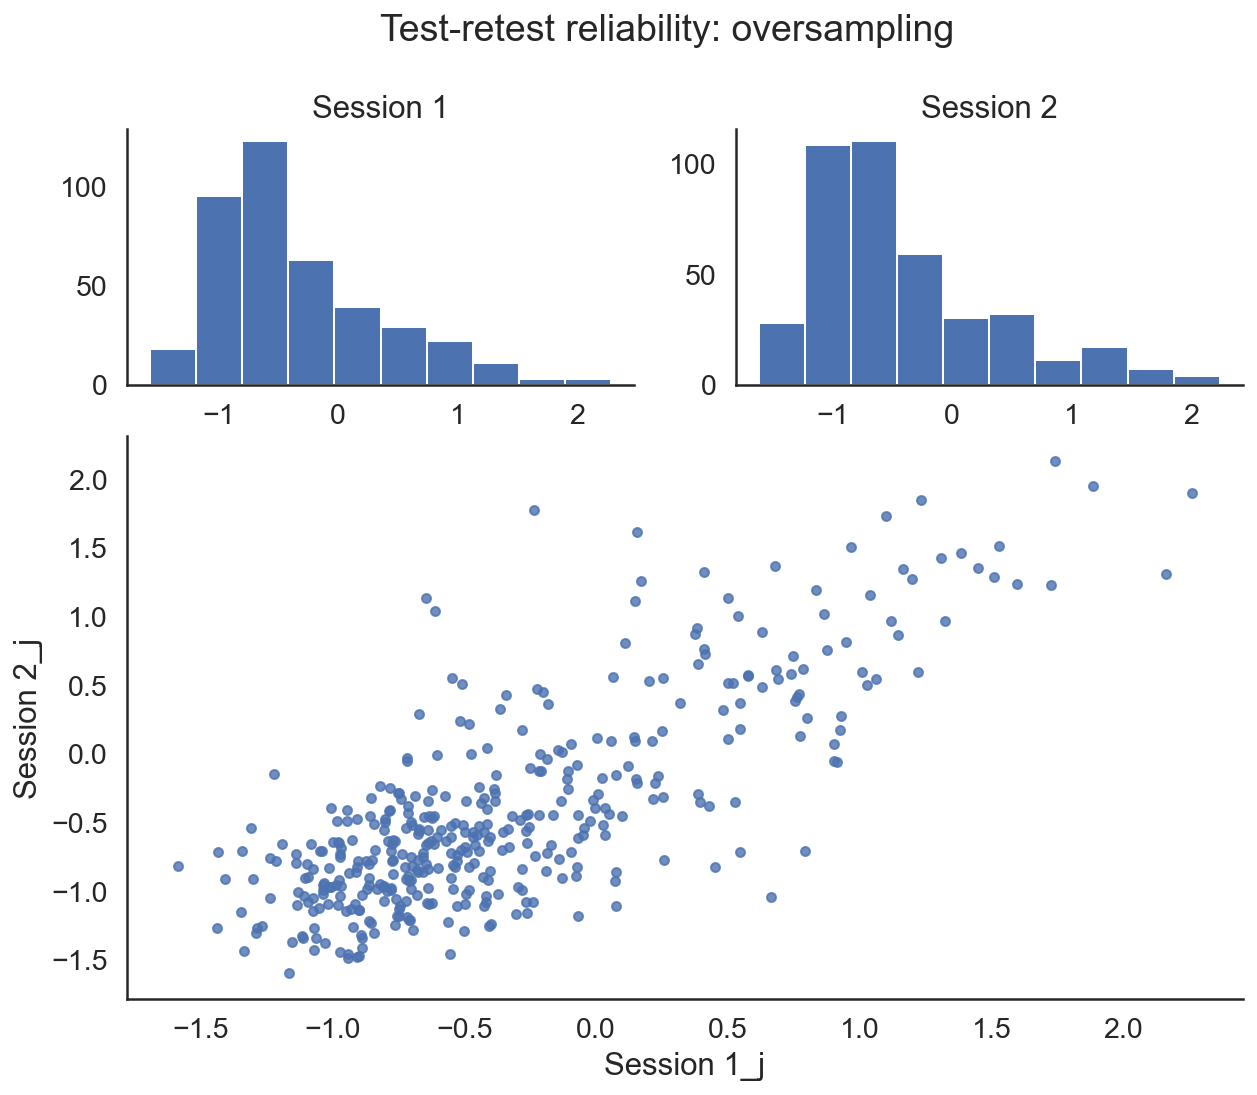

In [ ]:
_df = ist_scoring.get_average_oversampling(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean = stats.analyze_reliability(_df, dependent = 'oversampling', add_jitter = True)

### Based on predicted values (separate models)
Test-retest reliability for scores predicted by separate models for each session (for calculation of scores see `ist_scoring.get_oversampling_sep`).

R[write to console]: Lade nötiges Paket: lme4

R[write to console]: Lade nötiges Paket: Matrix

R[write to console]: 
Attache Paket: ‘lmerTest’


R[write to console]: Das folgende Objekt ist maskiert ‘package:lme4’:

    lmer


R[write to console]: Das folgende Objekt ist maskiert ‘package:stats’:

    step




,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.779,8.033,405.0,406.0,0.0,0.744,0.809,".78 (.74, .81)"
Single_random_raters,ICC2,0.779,8.287,405.0,405.0,0.0,0.742,0.811,".78 (.74, .81)"
Single_fixed_raters,ICC3,0.785,8.287,405.0,405.0,0.0,0.751,0.814,".78 (.75, .81)"
Average_raters_absolute,ICC1k,0.876,8.033,405.0,406.0,0.0,0.853,0.894,".88 (.85, .89)"
Average_random_raters,ICC2k,0.876,8.287,405.0,405.0,0.0,0.852,0.896,".88 (.85, .90)"
Average_fixed_raters,ICC3k,0.879,8.287,405.0,405.0,0.0,0.858,0.898,".88 (.86, .90)"


,variance,Percent
ID,0.295,0.779
Items,0.003,0.007
Residual,0.081,0.214
Total,0.378,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


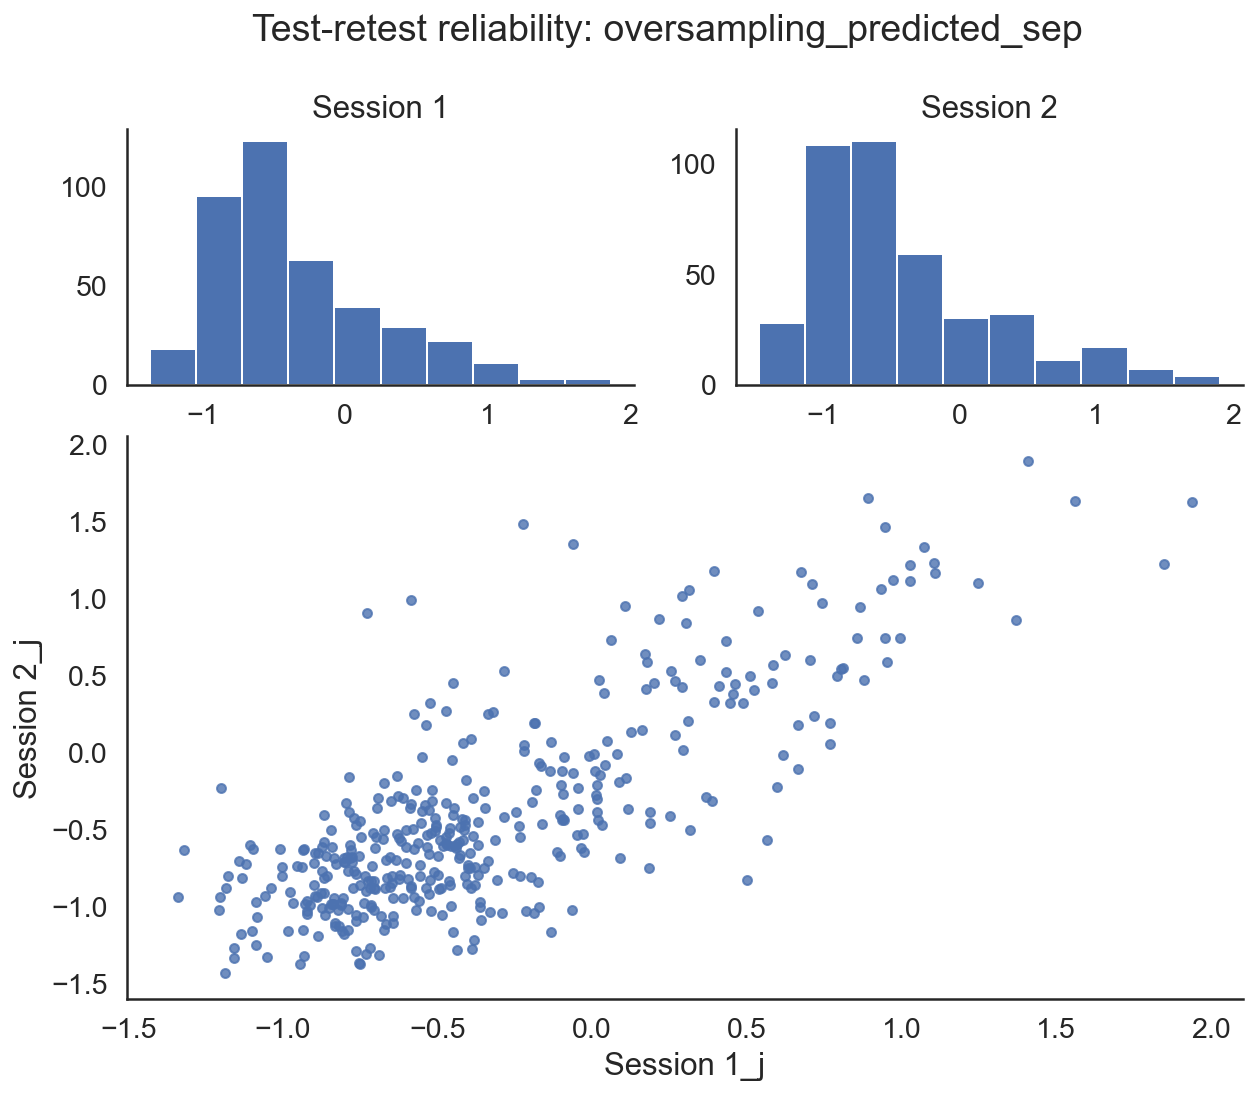

In [ ]:
_df = ist_scoring.get_oversampling_sep(df)[0]
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_predicted_sep = stats.analyze_reliability(_df, dependent = 'oversampling_predicted_sep', add_jitter = True)

### Based on predicted values (joint model)
Test-retest reliability for scores predicted by a joint model (for calculation of scores see `ist_scoring.get_oversampling_predicted_joint`).

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.966,58.526,405.0,406.0,0.0,0.961,0.971,".97 (.96, .97)"
Single_random_raters,ICC2,0.966,59.803,405.0,405.0,0.0,0.960,0.972,".97 (.96, .97)"
Single_fixed_raters,ICC3,0.967,59.803,405.0,405.0,0.0,0.961,0.972,".97 (.96, .97)"
Average_raters_absolute,ICC1k,0.983,58.526,405.0,406.0,0.0,0.980,0.985,".98 (.98, .99)"
Average_random_raters,ICC2k,0.983,59.803,405.0,405.0,0.0,0.980,0.986,".98 (.98, .99)"
Average_fixed_raters,ICC3k,0.983,59.803,405.0,405.0,0.0,0.980,0.986,".98 (.98, .99)"


,variance,Percent
ID,0.379,0.966
Items,0.000,0.001
Residual,0.013,0.033
Total,0.392,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


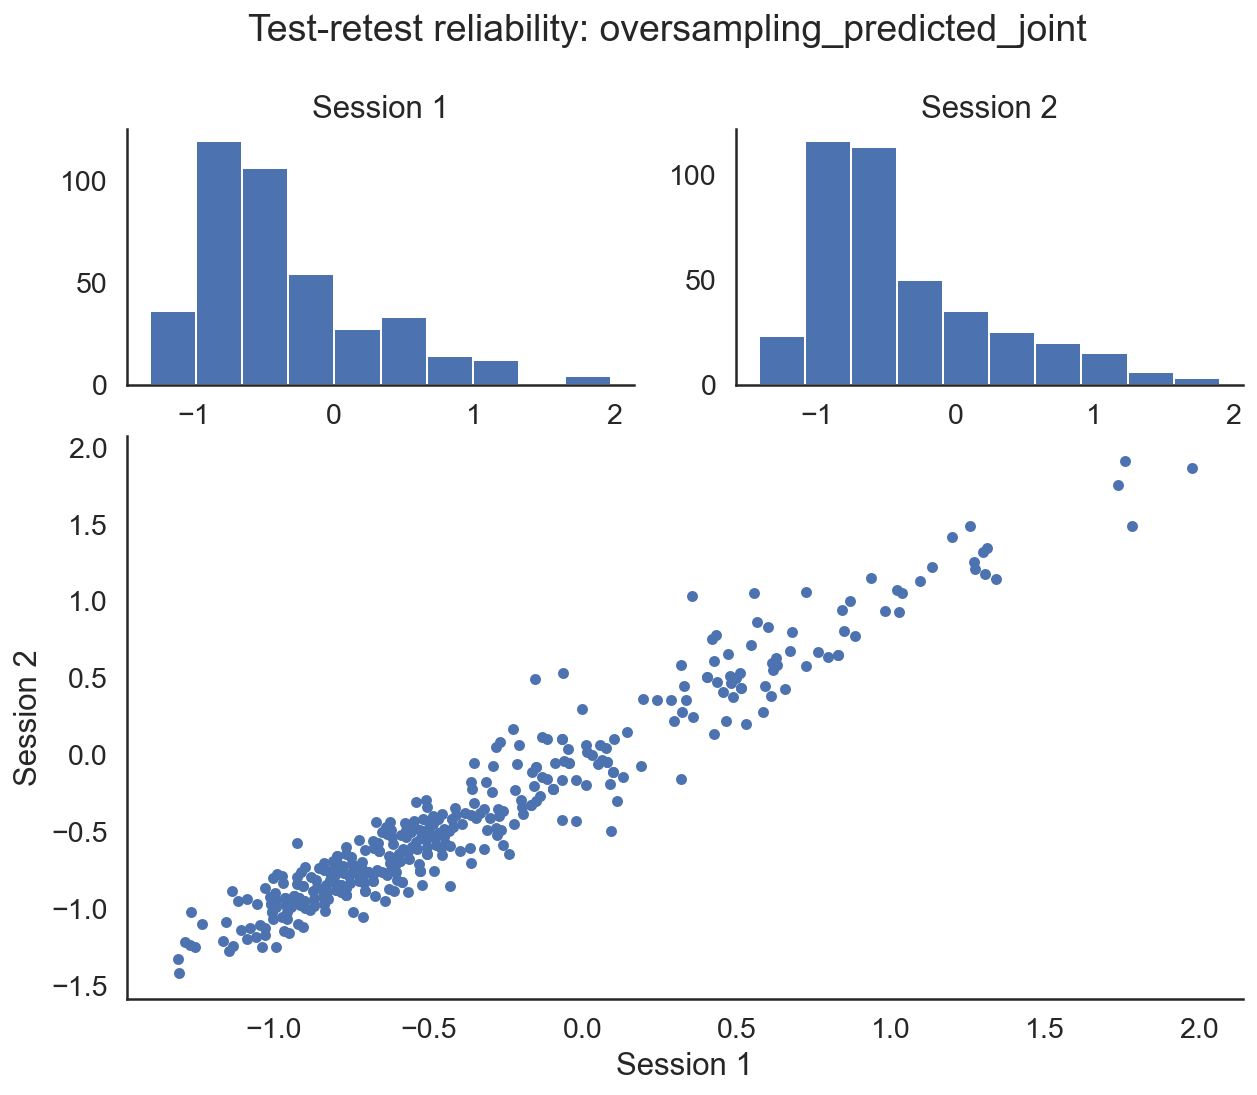

In [ ]:
_df, ms = ist_scoring.get_oversampling_predicted_joint(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_predicted_joint = stats.analyze_reliability(_df, dependent = 'oversampling_predicted_joint', add_jitter = False)

### Based on model-calculated variances

In [ ]:
model_calc = stats.get_model_calculated_icc(ms)
model_calc['icc']

R[write to console]: Lade nötiges Paket: insight



0.9120685231825058

## Comparison of methods

### All methods

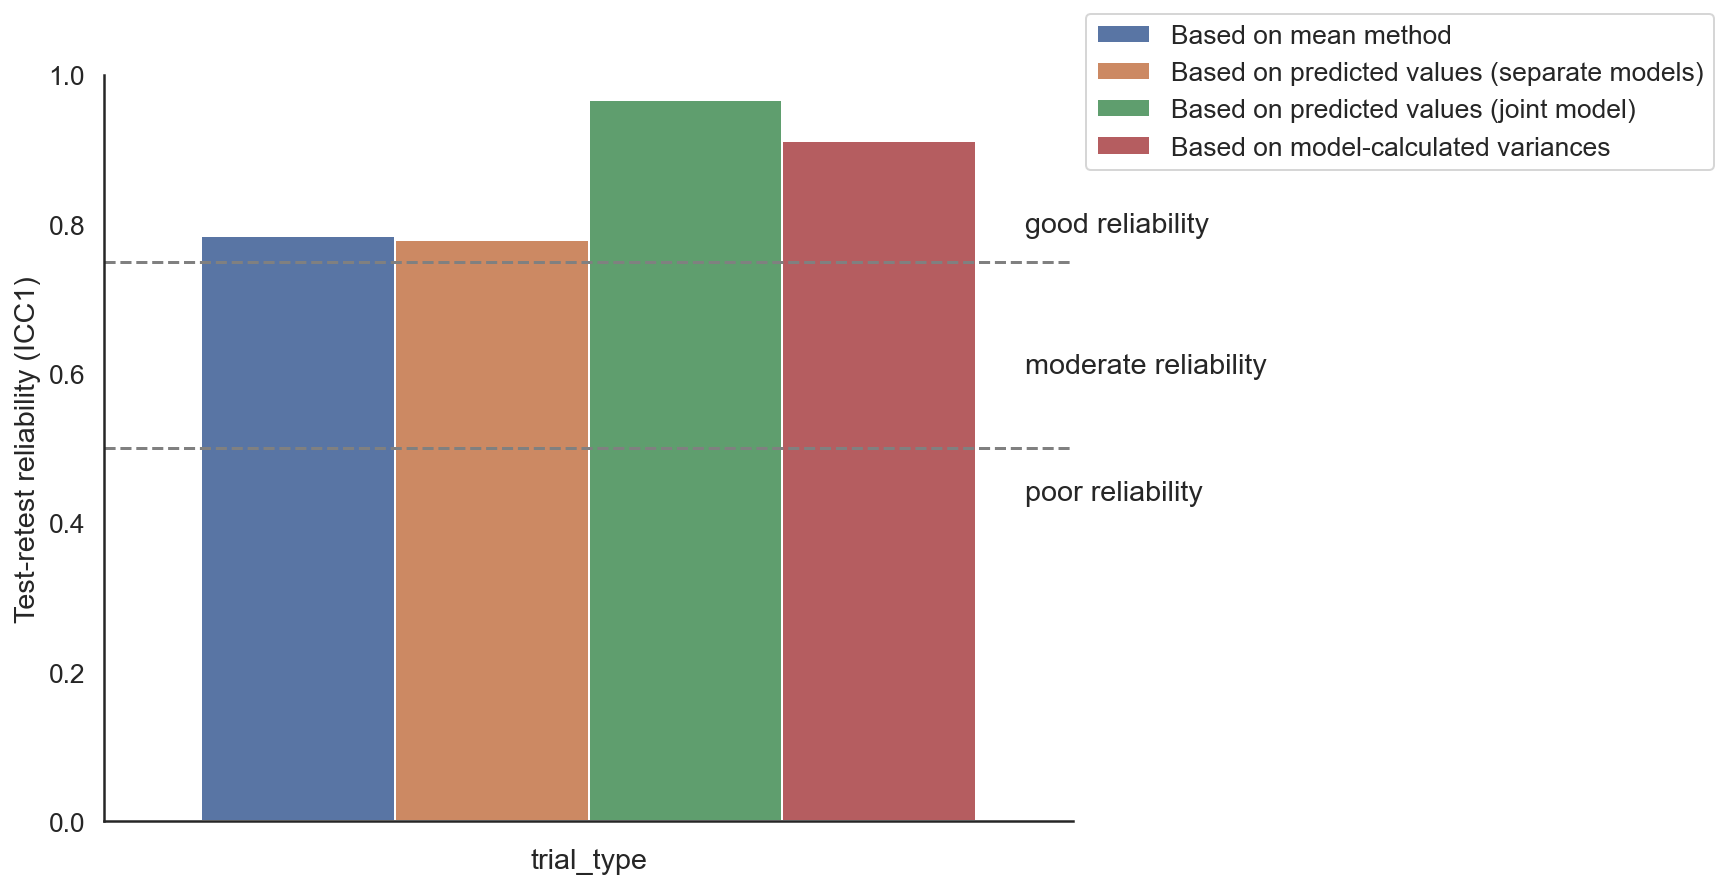

In [ ]:
iccs = {
    "mean_": iccs_mean,
    "trial_sep_": iccs_predicted_sep,
    "trial_joint_": iccs_predicted_joint,
    "model_calc_": model_calc
}

g = plotting.icc_comparison_plot(iccs, aspect = 1.3,qualitative_labels = True, 
                        x_offset = 0.45, font_scale = 1.2)

### Selected methods for manuscript

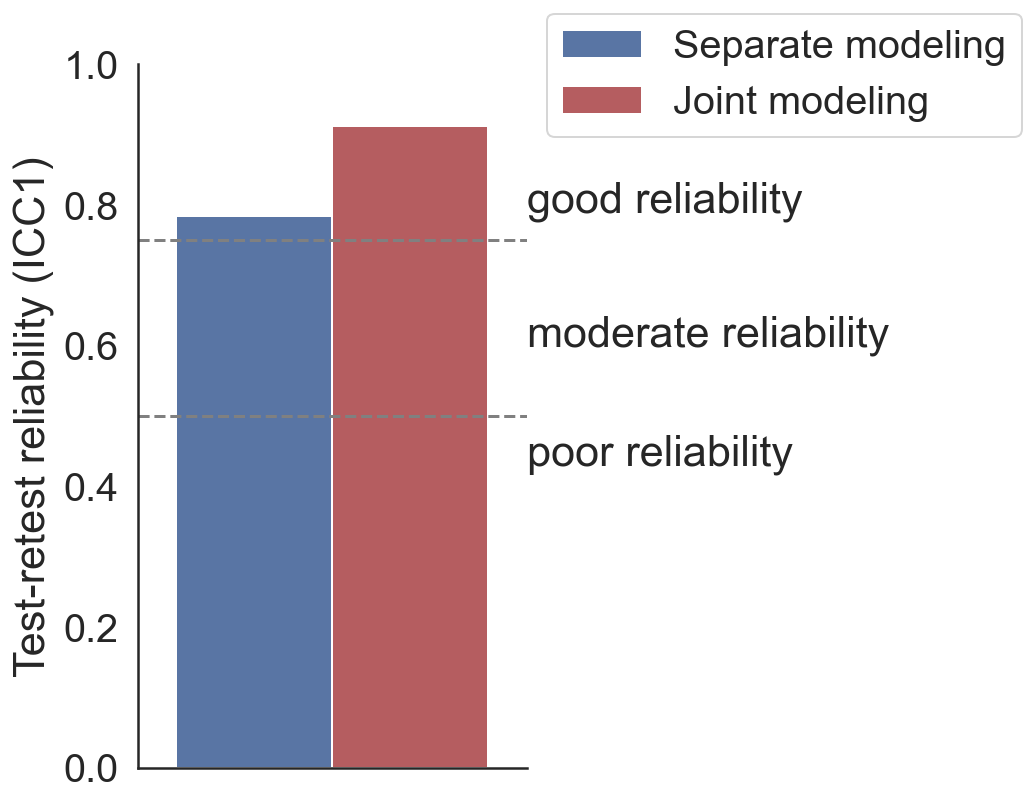

In [ ]:
iccs = {
    "Separate modeling_": iccs_mean,
    "Joint modeling_": model_calc,
}

palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)])
g = plotting.icc_comparison_plot(iccs, 
                       
                       palette = palette,
                       aspect = .7,
                       qualitative_labels = True,
                       x_offset = .5,
                       font_scale = 1.8)

ax = g.axes[0][0]

ax.set_xlabel('');


## Variance proportions

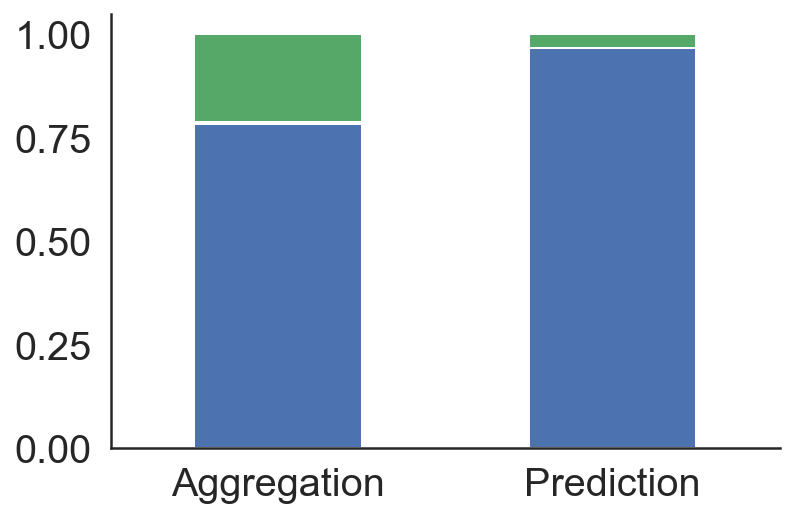

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean,'Prediction':iccs_predicted_joint})
ax.get_legend().remove()

In [ ]:
(0.001312-0.010629)/0.010629

-0.8765641170382914

,Participant,Session,Residual
Aggregation,0.784165,0.004608,0.211227
Prediction,0.966413,0.000717,0.032870


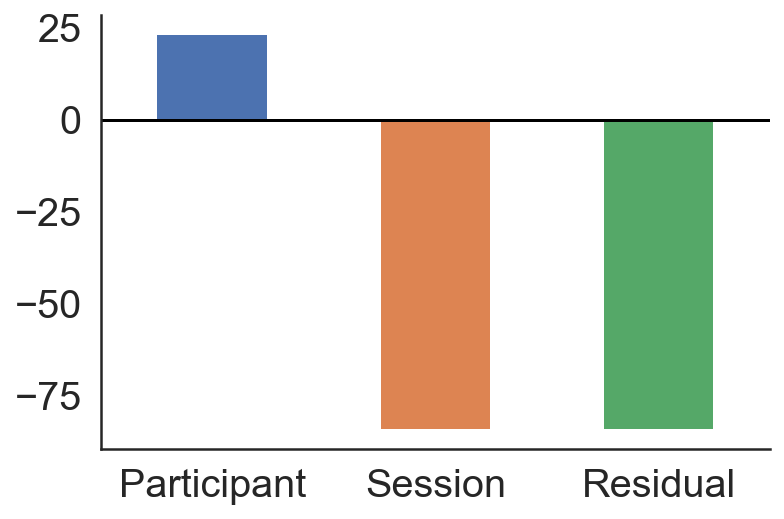

In [ ]:
def var_comp_plot_2(results):
    perc_variance = []
    for r in results.items():
        _df = r[1]['iccs'][1].T
        _df.columns = ['Participant','Session','Residual','Total']
        perc_variance.append(_df[['Participant','Session','Residual']].loc['Percent'])
    df = pd.DataFrame(perc_variance)
    df.index = results.keys()
    display(df)
    df.iloc[1] = df.iloc[1]/df.iloc[0]
    df = (df-1)*100
    
    ax = df.iloc[1].plot(kind = 'bar', stacked = False, color = sns.color_palette()[:3])
    ax.grid(False)
    sns.despine()
    ax.legend(bbox_to_anchor=(1.12, 1.05))
    plt.xticks(rotation=0)
    ax.axhline(0, color = 'black')
    #ax.set_ylim([-100,100])
    return ax
ax = var_comp_plot_2({'Aggregation':iccs_mean,'Prediction':iccs_predicted_joint})
ax.get_legend().remove()

## Effect of time

In [ ]:
scores = stats.get_scores(dp, dp.get_ist_data, ist_scoring.get_oversampling_predicted_joint)

N = 94


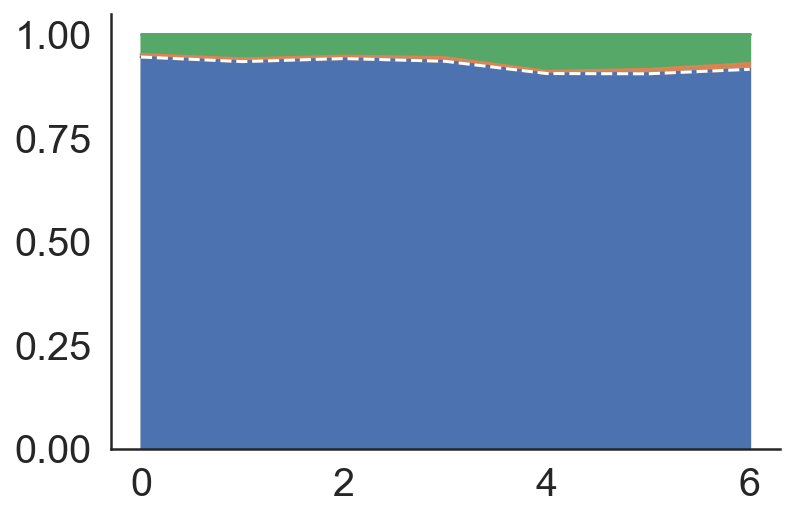

In [ ]:
stats.plot_time_effect_area(scores, 8, "oversampling_predicted_joint")

N = 94


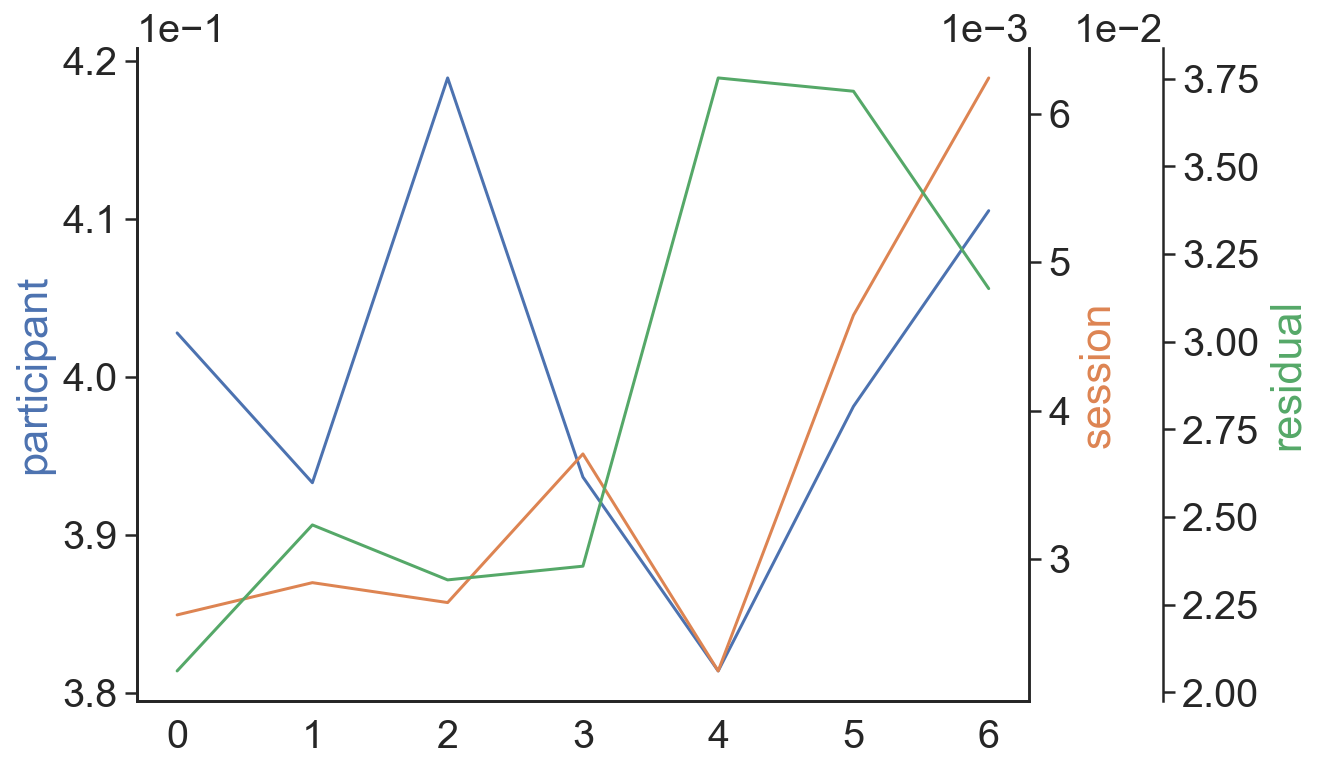

In [ ]:
ax = stats.plot_time_effect(scores, 8, "oversampling_predicted_joint", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

N = 94


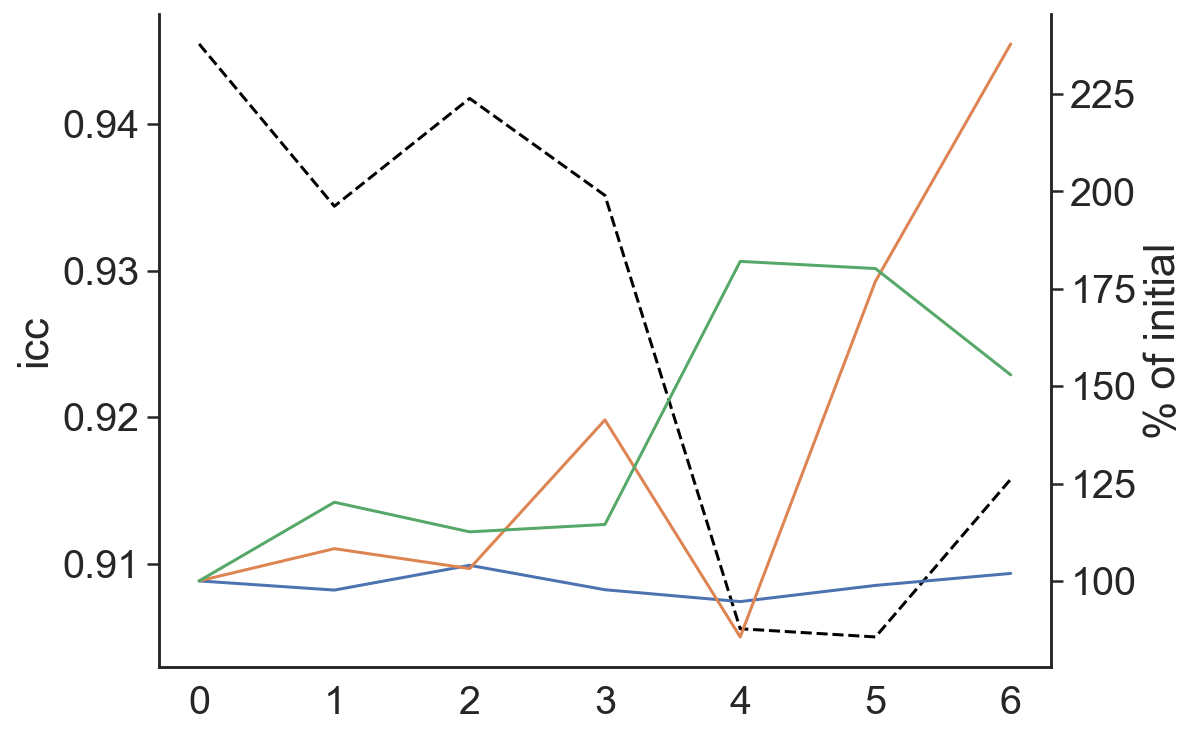

In [ ]:
ax = stats.plot_time_effect(scores, 8, "oversampling_predicted_joint", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

In [ ]:
def get_icc_and_variance(_df,
            dependent,
           icc_type = 'ICC2', scaling = 'Percent'): 
    '''Helper function that gets ICCs and variances'''
    outcomes = stats.analyze_reliability(_df, dependent = dependent, silent = True)['iccs']
    icc = outcomes[0].query('type=="%s"'%icc_type)['ICC'].iloc[0]
    variances = outcomes[1].T
    variances.columns = ['Participant','Session','Residual','Total']
    variances = variances.loc[scaling]
    return icc,variances.loc['Participant'],variances.loc['Session'],variances.loc['Residual']

get_icc_and_variance(scores,"oversampling_predicted_joint", scaling = 'variance')

R[write to console]: boundary (singular) fit: see ?isSingular



(0.95492126474328, 0.6284972153044373, 0.0, 0.029669314763779157)

### Absolute plot

N = 94


,icc,participant,session,residual
0,0.945460,0.402801,0.002623,0.020613
1,0.934391,0.393322,0.002841,0.024777
2,0.941743,0.418934,0.002706,0.023209
3,0.935132,0.393679,0.003708,0.023601
4,0.905575,0.381413,0.002246,0.037524
5,0.905017,0.398151,0.004642,0.037145
6,0.915777,0.410536,0.006240,0.031516


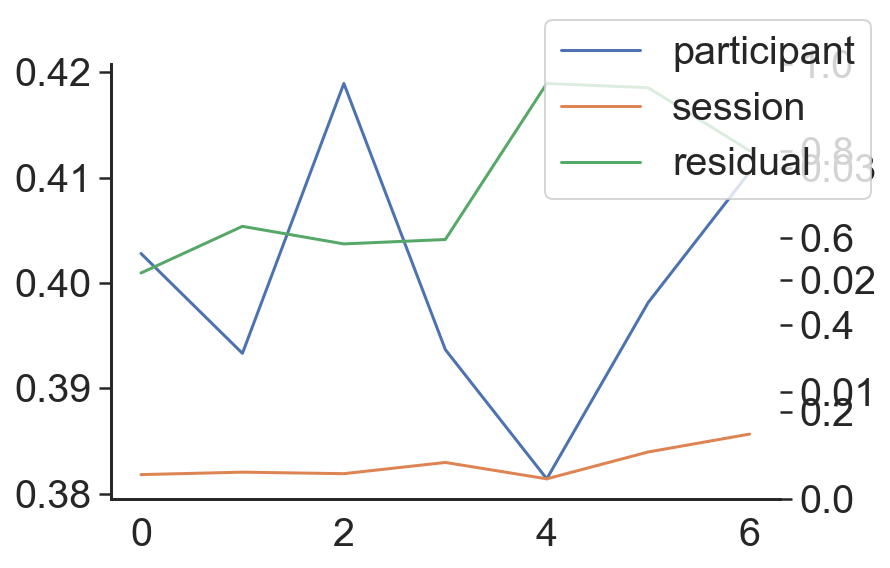

In [ ]:
def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent'):
    time_data = []
    # Checking which participants have all sessions
    pps = _df.query('session_number<%d'%(sessions+1)).groupby('participant')[_df.columns[0]].agg(lambda x: len(x.dropna()))==sessions
    pps = pps[pps].index
    print("N = %d"%(len(pps)))

    for i in range(sessions-1):
        session_filter = "(session_number==1) or (session_number==%d)"%(i+2)
        __df = _df.query(session_filter)
        __df = __df[__df.participant.isin(pps)]
        d = {}
        d['icc'],d['participant'],d['session'],d['residual'] = get_icc_and_variance(__df, dependent, scaling = scaling)
        time_data.append(d)
    df = pd.DataFrame(time_data, index = pd.Series(range(sessions-1)))
    #ax = df[['participant','session','residual']].plot.area(legend = legend)
    display(df)
    ax = df.plot(y="participant", legend=False, color = sns.color_palette()[0])
    ax2 = ax.twinx()
    df.plot(y="session", ax=ax2, legend=False, color = sns.color_palette()[1])
    ax3 = ax.twinx()
    df.plot(y="residual", ax=ax2, legend=False, color = sns.color_palette()[2])
    ax.figure.legend()
    ax.xaxis.get_major_locator().set_params(integer=True)
    
plot_time_effect(scores, 8, "oversampling_predicted_joint", scaling = 'variance')

### Relative change plot

N = 94


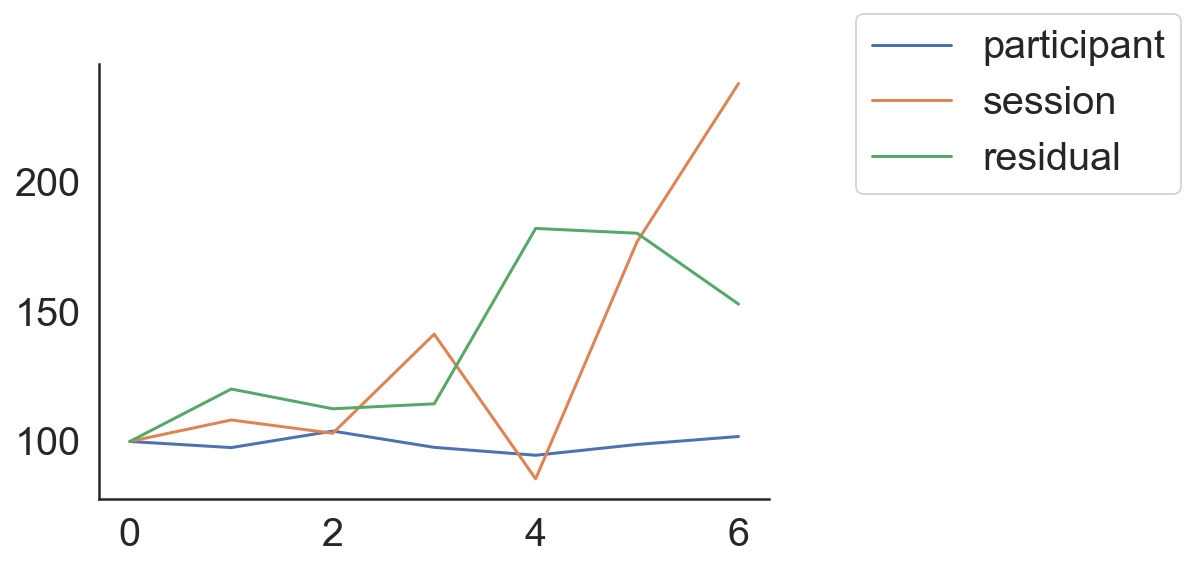

In [ ]:
def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent', change = False):
    time_data = []
    # Checking which participants have all sessions
    pps = _df.query('session_number<%d'%(sessions+1)).groupby('participant')[_df.columns[0]].agg(lambda x: len(x.dropna()))==sessions
    pps = pps[pps].index
    print("N = %d"%(len(pps)))

    for i in range(sessions-1):
        session_filter = "(session_number==1) or (session_number==%d)"%(i+2)
        __df = _df.query(session_filter)
        __df = __df[__df.participant.isin(pps)]
        d = {}
        d['icc'],d['participant'],d['session'],d['residual'] = get_icc_and_variance(__df, dependent, scaling = scaling)
        time_data.append(d)
    df = pd.DataFrame(time_data, index = pd.Series(range(sessions-1)))
    if change:
        df = (df/df.iloc[0])*100
    ax = df[['participant','session','residual']].plot(legend = legend)
    #display(df)
    #ax = df.plot(y="participant", legend=False, color = sns.color_palette()[0])
    #ax2 = ax.twinx()
    #df.plot(y="session", ax=ax2, legend=False, color = sns.color_palette()[1])
    #ax3 = ax.twinx()
    #df.plot(y="residual", ax=ax2, legend=False, color = sns.color_palette()[2])
    ax.figure.legend(bbox_to_anchor=[1.4, 1])
    ax.xaxis.get_major_locator().set_params(integer=True)
    
_df = plot_time_effect(scores, 8, "oversampling_predicted_joint", scaling = 'variance', change = True)

### Area plot

N = 94


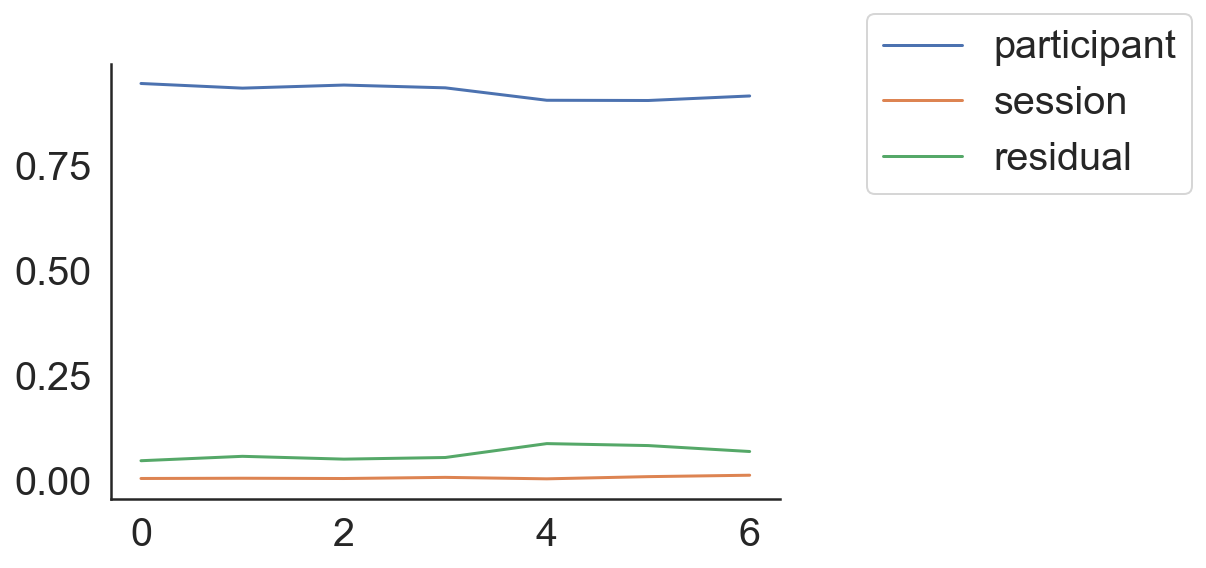

In [ ]:
plot_time_effect(scores, 8, "oversampling_predicted_joint")